# Лабораторная работа 3
### Выполнил: ФИО

Добро пожаловать в третью лабораторную работу! 
Оформите ваше решение контеста Kaggle в соответствии с этим шаблоном. Ваша задача - показать проверяющим ход ваших рассуждений, поэтому советуем писать много комментариев к коду и приводить комментарии к логике на каждом этапе в текстовых ячейках. 
Где необходимо, используйте графики для большей наглядности.

При отправке поменяйте название файла на ваши ФИО!

### Настройка Google Colab

Подключение вашего гугл диска (советуем сохранять все важные артефакты именно на диск, чтобы они не удалились при закрытии вкладки с ноутбуком).

In [138]:
# from google.colab import drive
# drive.mount('/content/drive')

Если вы используете google colab и загрузка датасета занимает больше минуты - раскомментируйте и выполните эту ячейку.

In [139]:
# import json
# import os

# def download_contest3_data():
#   # !mkdir ~/.kaggle # закоментить если ругается
#   # !touch ~/.kaggle/kaggle.json # закоментить если ругается

#   # токен надо сгенерировать в личном кабинете на kaggle (https://www.kaggle.com/settings/account)
#   api_token = {"username":"fokuspokus","key":"abrakadabra"}
#   with open('/root/.kaggle/kaggle.json', 'w') as file:
#       json.dump(api_token, file)

#   !chmod 600 ~/.kaggle/kaggle.json

#   !kaggle competitions download -p /content/drive/MyDrive/ -c ml-mipt-2023-contest-3

#   if not os.path.isdir("/content/drive/MyDrive/contest3"):
#     !mkdir /content/drive/MyDrive/contest3

#   !unzip /content/drive/MyDrive/ml-mipt-2023-contest-3.zip -d /content/drive/MyDrive/contest3

# download_contest3_data()

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import random
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset, random_split
from PIL import Image
import os

In [141]:
my_seed = 11 # любое целое число на ваш выбор
np.random.seed(my_seed)
torch.manual_seed(my_seed)

In [142]:
# Параметры
IMG_SIZE = 64
BATCH_SIZE = 32
LEARNING_RATE = 0.001
EPOCHS = 10
PATH_TO_TRAIN_LABELS = "train_labels.csv" # "/content/drive/MyDrive/contest3/train_labels.csv"
PATH_TO_IMAGE_TRAIN = "images/images/train" # "/content/drive/MyDrive/contest3/images/images/train"
PATH_TO_IMAGE_TEST = "images/images/test" # "/content/drive/MyDrive/contest3/images/images/test"
PATH_TO_IMAGE_TEST = "submission.csv" # # "/content/drive/MyDrive/contest3/images/images/test"

### EDA (исследовательский анализ данных)

В этой лабораторной вы работаете с картинками. Напишите функцию, которая отрисовывала бы ключевые точки на конкретном изображении, это вам пригодится для дебага. 
Можете посчитать статистики по картинкам в датасете.

In [143]:
# exploratory data analysis

In [144]:
train_labels = pd.read_csv(PATH_TO_TRAIN_LABELS)
train_labels

,left_eye_x,left_eye_y,right_eye_x,right_eye_y,mouth_x,mouth_y,left_ear_1_x,left_ear_1_y,left_ear_2_x,left_ear_2_y,left_ear_3_x,left_ear_3_y,right_ear_1_x,right_ear_1_y,right_ear_2_x,right_ear_2_y,right_ear_3_x,right_ear_3_y,file_name
0,177.0,124.0,240.0,146.0,208.0,172.0,132.0,97.0,149.0,30.0,190.0,81.0,245.0,102.0,304.0,95.0,268.0,145.0,b4735fa043136534973c17fca358aee9.jpg
1,90.0,231.0,169.0,220.0,134.0,287.0,55.0,202.0,33.0,129.0,77.0,164.0,155.0,153.0,199.0,101.0,207.0,180.0,8d8a9448a43e70077784825b26433d6d.jpg
2,254.0,160.0,340.0,174.0,286.0,245.0,207.0,126.0,207.0,14.0,274.0,94.0,336.0,103.0,422.0,50.0,384.0,155.0,274977dfe9d5cceb1e0a3bb57088164b.jpg
3,559.0,309.0,729.0,353.0,631.0,390.0,470.0,239.0,479.0,87.0,572.0,205.0,756.0,248.0,896.0,188.0,837.0,335.0,dfcd37f5dba0df53a2656b46b8aeb7f4.jpg
4,143.0,159.0,229.0,145.0,186.0,226.0,108.0,121.0,71.0,34.0,141.0,74.0,230.0,59.0,287.0,3.0,290.0,89.0,9ae060a543c60e4dc9d3539cfbc8fb79.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8992,225.0,174.0,262.0,172.0,248.0,202.0,192.0,164.0,183.0,125.0,218.0,143.0,256.0,141.0,288.0,109.0,282.0,159.0,de3464bcbb1d73b3ef7e8bad03915679.jpg
8993,227.0,249.0,281.0,215.0,281.0,289.0,180.0,230.0,132.0,187.0,196.0,193.0,240.0,165.0,251.0,94.0,307.0,149.0,5a43ed01be5fabd7996df04737676f90.jpg
8994,153.0,190.0,248.0,195.0,200.0,263.0,105.0,153.0,108.0,42.0,173.0,114.0,233.0,117.0,303.0,54.0,293.0,163.0,d000deba722181897c47072795d375a2.jpg
8995,140.0,120.0,191.0,119.0,177.0,162.0,87.0,88.0,99.0,22.0,127.0,58.0,181.0,58.0,220.0,26.0,198.0,87.0,507554beaf5e54713f39279ec816e388.jpg


In [145]:
train_labels.columns.tolist()

['left_eye_x',
 'left_eye_y',
 'right_eye_x',
 'right_eye_y',
 'mouth_x',
 'mouth_y',
 'left_ear_1_x',
 'left_ear_1_y',
 'left_ear_2_x',
 'left_ear_2_y',
 'left_ear_3_x',
 'left_ear_3_y',
 'right_ear_1_x',
 'right_ear_1_y',
 'right_ear_2_x',
 'right_ear_2_y',
 'right_ear_3_x',
 'right_ear_3_y',
 'file_name']

In [146]:
train_labels.dtypes

left_eye_x       float64
left_eye_y       float64
right_eye_x      float64
right_eye_y      float64
mouth_x          float64
mouth_y          float64
left_ear_1_x     float64
left_ear_1_y     float64
left_ear_2_x     float64
left_ear_2_y     float64
left_ear_3_x     float64
left_ear_3_y     float64
right_ear_1_x    float64
right_ear_1_y    float64
right_ear_2_x    float64
right_ear_2_y    float64
right_ear_3_x    float64
right_ear_3_y    float64
file_name         object
dtype: object

In [147]:
train_labels.isnull().sum()

left_eye_x       0
left_eye_y       0
right_eye_x      0
right_eye_y      0
mouth_x          0
mouth_y          0
left_ear_1_x     0
left_ear_1_y     0
left_ear_2_x     0
left_ear_2_y     0
left_ear_3_x     0
left_ear_3_y     0
right_ear_1_x    0
right_ear_1_y    0
right_ear_2_x    0
right_ear_2_y    0
right_ear_3_x    0
right_ear_3_y    0
file_name        0
dtype: int64

In [148]:
def visualize_keypoints(image_path, keypoints):
    img = Image.open(image_path).convert("RGB")
    plt.imshow(img)

    # Разделяем ключевые точки на x и y
    x_points = keypoints[::2]
    y_points = keypoints[1::2]
    
    # Отрисовываем точки поверх изображения
    plt.scatter(x_points, y_points, color='red', label="Keypoints")
    plt.show()

In [149]:
def visualize_transformed_keypoints(image, keypoints):
    # Преобразуем изображение обратно в numpy массив для отображения
    image_np = image.permute(1, 2, 0).numpy()  # Изменяем размерность с (C, H, W) на (H, W, C)
    
    plt.imshow(image_np)

    # Разделяем ключевые точки на x и y
    x_points = keypoints[:, 0]
    y_points = keypoints[:, 1]
    
    # Отрисовываем точки поверх изображения
    plt.scatter(x_points, y_points, color='red', label="Keypoints")
    plt.legend()
    plt.show()

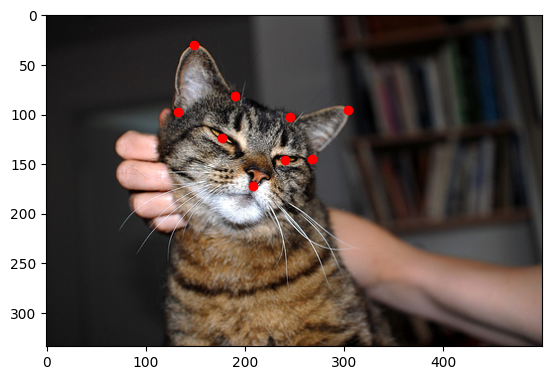

In [150]:
# Пример работы visualize_keypoints
image_path = PATH_TO_IMAGE_TRAIN + "/"+ train_labels.iloc[0, -1]

keypoints = train_labels.iloc[0, :-1].to_numpy().astype(float)

visualize_keypoints(image_path, keypoints)

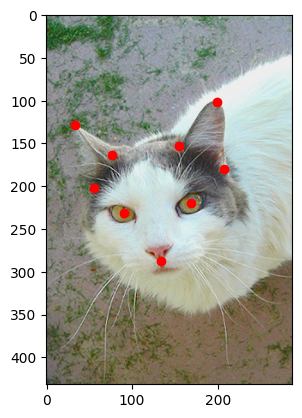

In [151]:
# Пример работы visualize_keypoints
image_path = PATH_TO_IMAGE_TRAIN + "/"+ train_labels.iloc[1, -1]

keypoints = train_labels.iloc[1, :-1].to_numpy().astype(float)

visualize_keypoints(image_path, keypoints)

In [152]:
def dataset_statistics(train_labels, image_folder):
    return

### Preprocessing (подготовка данных)

Мы ожидаем, что в этом разделе вы реализуете кастомный класс для подгрузки данных (cоветуем унаследоваться от `torch.utils.data.Dataset`).

In [153]:
# dataset implementation

In [154]:
class CatKeypointsDataset(Dataset):
    def __init__(self, csv_file, image_folder, transform=None, target_size=(IMG_SIZE, IMG_SIZE)):
        """
        Инициализация датасета.

        Args:
            csv_file (pd.DataFrame): DataFrame с разметкой.
            image_folder (str): Путь к папке с изображениями.
            transform (callable, optional): Преобразования для изображений.
            target_size (tuple, optional): Целевой размер изображений (ширина, высота).
        """
        self.annotations = csv_file
        self.image_folder = image_folder
        self.transform = transform
        self.target_size = target_size

    def __len__(self):
        """Возвращает длину датасета."""
        return len(self.annotations)

    def __getitem__(self, idx):
        """
        Возвращает один элемент датасета.

        Args:
            idx (int): Индекс элемента.

        Returns:
            tuple: (изображение, координаты ключевых точек)
        """
        # Получаем путь к изображению
        img_name = os.path.join(self.image_folder, self.annotations.iloc[idx, -1])
        image = Image.open(img_name).convert("RGB")

        # Исходные размеры изображения
        original_width, original_height = image.size

        # Извлекаем координаты ключевых точек
        keypoints = self.annotations.iloc[idx, :-1].to_numpy().astype(float).reshape(-1, 2)

        # Пропорциональное изменение координат ключевых точек
        scale_x = self.target_size[0] / original_width
        scale_y = self.target_size[1] / original_height
        keypoints[:, 0] *= scale_x
        keypoints[:, 1] *= scale_y

        # Приведение изображения к новому размеру
        image = image.resize(self.target_size)

        # Применяем трансформации к изображению (если указаны)
        if self.transform:
            image = self.transform(image)

        # Возвращаем изображение и ключевые точки
        return image, torch.tensor(keypoints, dtype=torch.float)

In [155]:
# Преобразования для изображений
data_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),  # Приведение изображений к одному размеру
    transforms.ToTensor(),         # Преобразование в тензор
])

# Создание датасета
dataset = CatKeypointsDataset(
    csv_file=train_labels,
    image_folder=PATH_TO_IMAGE_TRAIN,
    transform=data_transforms
)

# Пример получения одного элемента
image, keypoints = dataset[0]
print(f"Размер изображения: {image.shape}")
print(f"Координаты ключевых точек: {keypoints}")

Размер изображения: torch.Size([3, 64, 64])
Координаты ключевых точек: tensor([[22.6560, 23.7605],
        [30.7200, 27.9760],
        [26.6240, 32.9581],
        [16.8960, 18.5868],
        [19.0720,  5.7485],
        [24.3200, 15.5210],
        [31.3600, 19.5449],
        [38.9120, 18.2036],
        [34.3040, 27.7844]])


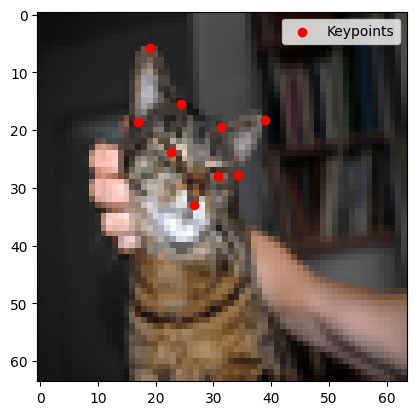

In [156]:
# Пример получения одного элемента
image, keypoints = dataset[0]

# Визуализация ключевых точек на изображении
visualize_transformed_keypoints(image, keypoints)

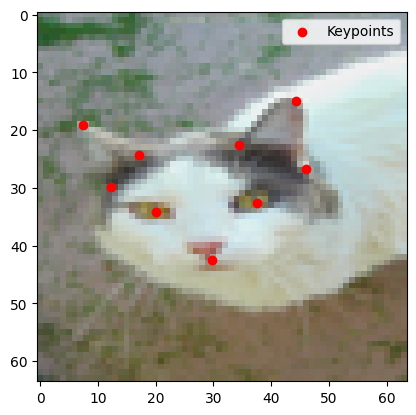

In [157]:
# Пример получения одного элемента
image, keypoints = dataset[1]

# Визуализация ключевых точек на изображении
visualize_transformed_keypoints(image, keypoints)

### Training/evaluation loop

В этом разделе напишите функцию, принимающую модель, оптимизатор, кол-во эпох, и т.д, которая осуществляет обучение с заданными параметрами. Подумайте, что функция будет возвращать. 

Смысл этого раздела в том, чтобы не дублировать код обучения для каждого эксперимента. А еще на такую функцию легко накинуть перебор гиперпараметров... 

In [158]:
### function for training

In [159]:
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs, device):
    history = {"train_loss": [], "val_loss": []}
    model.to(device)

    for epoch in range(num_epochs):
        # Этап обучения
        model.train()
        train_loss = 0
        for images, keypoints in train_loader:
            images, keypoints = images.to(device), keypoints.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, keypoints)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        # Этап валидации
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for images, keypoints in val_loader:
                images, keypoints = images.to(device), keypoints.to(device)
                outputs = model(images)
                loss = criterion(outputs, keypoints)
                val_loss += loss.item()

        # Записываем лоссы
        train_loss /= len(train_loader)
        val_loss /= len(val_loader)
        history["train_loss"].append(train_loss)
        history["val_loss"].append(val_loss)

        print(f"Эпоха {epoch + 1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

    return model, history

### Prediction function

Реализуйте функцию, которая бы делала предсказания. Функция принимает датасет/даталоадер и модель (мб еще что-то). Эта функция нужна вам, чтобы было удобнее считать метрику (по сути она будет склеивать предсказания из батчей в один массив). 

In [160]:
### function for making predictions

In [161]:
def make_predictions(model, dataloader, device):
    """
    Make predictions using the model on the provided DataLoader.

    Args:
        model (nn.Module): The trained PyTorch model.
        dataloader (DataLoader): The DataLoader for the dataset to predict on.
        device (torch.device): The device to use for computation (CPU or GPU).

    Returns:
        np.ndarray: A numpy array containing all predictions.
        np.ndarray: A numpy array containing all ground truth keypoints (if available).
    """
    model.eval()  # Set the model to evaluation mode
    predictions = []
    ground_truths = []

    with torch.no_grad():
        for images, keypoints in dataloader:
            images = images.to(device)
            outputs = model(images).cpu().numpy()
            predictions.append(outputs)
            
            if keypoints is not None:  # Ground truth may not be available for test data
                ground_truths.append(keypoints.cpu().numpy())

    predictions = np.vstack(predictions)  # Combine predictions from all batches
    ground_truths = np.vstack(ground_truths) if ground_truths else None

    return predictions, ground_truths

### Experiments

В этом разделе задаете архитектуры моделей и ставите эксперименты по обучению. Мы ожидаем, что вы зададите модель в виде класса (унаследуетесь от класса `torch.nn.Module`).

Если вы ставили много экспериментов, приведите их в хронологическом порядке, чтобы мы увидели эволюцию ваших рассуждений. 

Мы ожидаем увидеть графики train/val лоссов и метрик для ваших экспериментов. Мы ожидаем увидеть визуализацию примеров предсказаний. 

#### Эксперимент 1

In [162]:
# some code and comments

In [163]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * (IMG_SIZE // 8) * (IMG_SIZE // 8), 512),
            nn.ReLU(),
            nn.Linear(512, 18)  # Изменено на 18 (9 ключевых точек * 2 координаты)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x.view(x.size(0), -1, 2)  # (batch_size, num_keypoints, 2)

In [164]:
def plot_losses(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history['train_loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.xlabel('Эпохи')
    plt.ylabel('Лосс')
    plt.title('Train vs Validation Loss')
    plt.legend()
    plt.show()

In [165]:
# Создание датасета
annotations = pd.read_csv(PATH_TO_TRAIN_LABELS)
dataset = CatKeypointsDataset(annotations, PATH_TO_IMAGE_TRAIN, transform=transforms.ToTensor())

In [166]:
# Разделение на обучающую и валидационную выборки
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

In [167]:
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [168]:
# Устройство
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [169]:
# Эксперимент 1: Простая CNN
model = SimpleCNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

print("\n=== Эксперимент 1: Простая CNN ===")
model, history = train_model(model, train_loader, val_loader, criterion, optimizer, EPOCHS, device)


=== Эксперимент 1: Простая CNN ===
Эпоха 1/10, Train Loss: 106.2966, Val Loss: 84.2266
Эпоха 2/10, Train Loss: 82.0537, Val Loss: 79.1047
Эпоха 3/10, Train Loss: 74.9635, Val Loss: 73.8473
Эпоха 4/10, Train Loss: 66.1174, Val Loss: 66.3026
Эпоха 5/10, Train Loss: 61.7951, Val Loss: 59.2544
Эпоха 6/10, Train Loss: 59.0033, Val Loss: 57.1548
Эпоха 7/10, Train Loss: 55.6027, Val Loss: 53.2056
Эпоха 8/10, Train Loss: 51.7883, Val Loss: 50.8779
Эпоха 9/10, Train Loss: 48.3519, Val Loss: 51.2157
Эпоха 10/10, Train Loss: 43.9535, Val Loss: 47.1077


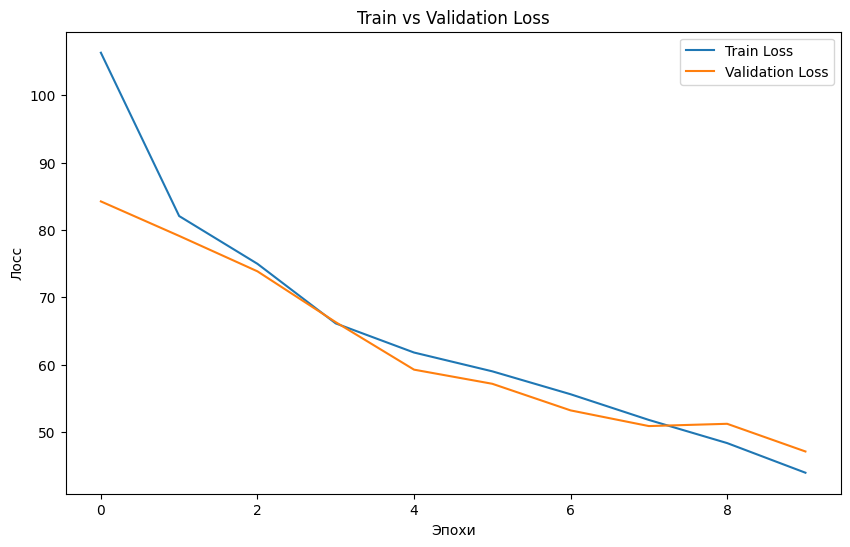

In [170]:
plot_losses(history)

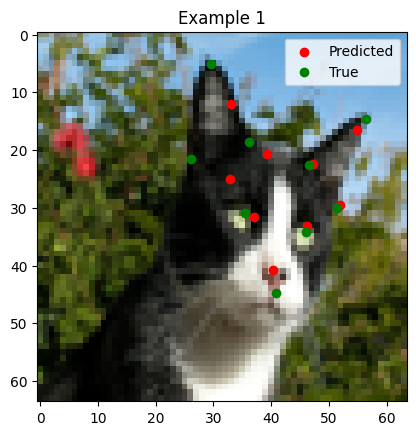

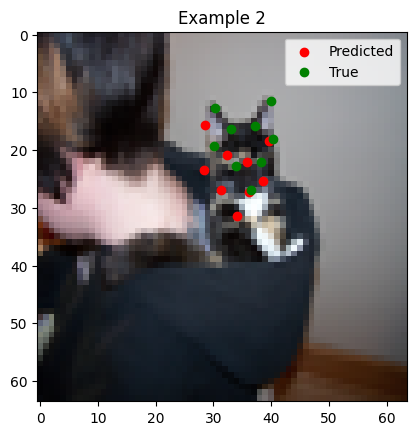

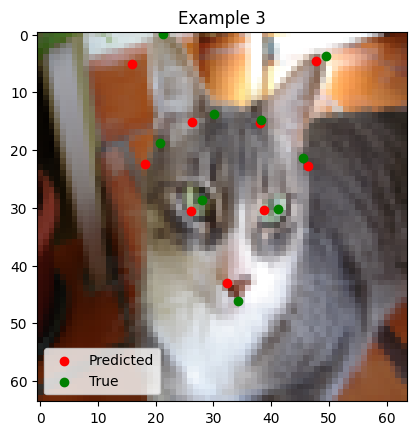

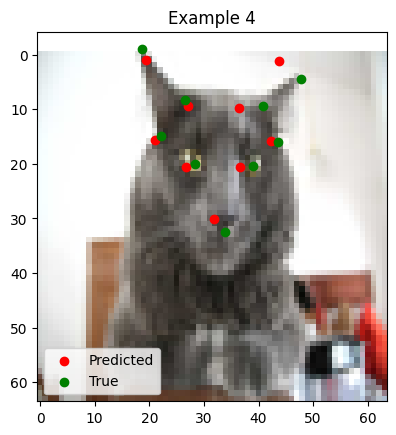

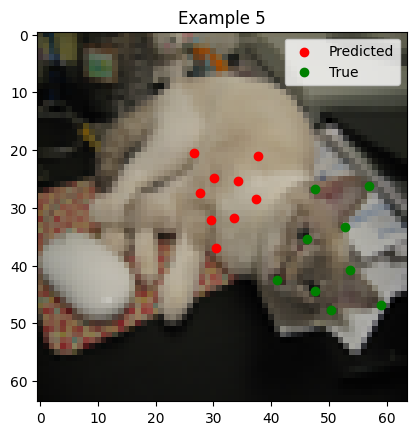

In [176]:
# Визуализация предсказаний
model.eval()
sample_images, sample_keypoints = next(iter(val_loader))
sample_images = sample_images.to(device)
predictions = model(sample_images).detach().cpu().numpy()
sample_images = sample_images.cpu().numpy()

for i in range(5):
    img = sample_images[i].transpose(1, 2, 0)  # Преобразование для отображения
    pred_keypoints = predictions[i]
    true_keypoints = sample_keypoints[i].numpy()

    plt.imshow(img)
    plt.scatter(pred_keypoints[:, 0], pred_keypoints[:, 1], c="r", label="Predicted")
    plt.scatter(true_keypoints[:, 0], true_keypoints[:, 1], c="g", label="True")
    plt.legend()
    plt.title(f"Example {i + 1}")
    plt.show()

#### Эксперимент 2

In [ ]:
# some code and comments

#### Эксперимент 3

In [ ]:
# some code and comments

### Evaluation  (оценка качества модели)

В этом разделе проводите оценку качества вашей итоговой модели (с помощью prediction function из раздела выше). 

In [ ]:
# model evaluation

### Conclusion (Выводы)

В этом разделе описываете полученные результаты и проводите анализ выполненной работы. 
Что получилось / не получилось и почему?